# Image Classification using a pre-trained CovNet

In [1]:
# Import relevant libraries
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

import os

Using TensorFlow backend.


In [2]:
# Load the ImageNet pre-trained weight to the model
model = ResNet50(weights='imagenet')

In [3]:
def classify(img_path):
    # Show photograph
    plt.imshow(mpimg.imread(img_path))
    plt.show()

    # Load and reshape image
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Feed image to model
    x = preprocess_input(x)

    # Get predictions
    yhat = model.predict(x)

    # Results in a list of tuples (class, description, probability)
    label = decode_predictions(yhat, top=3)[0]

    # Print output
    print('Predicted:')
    for i, obj in enumerate(label):
        print('%d- %s (%.2f%%)' % (i+1, obj[1], obj[2]*100) )

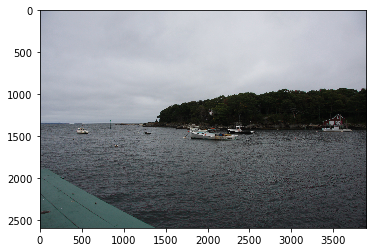

Predicted:
1- seashore (28.07%)
2- breakwater (20.19%)
3- dock (15.51%)


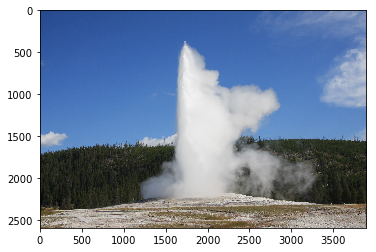

Predicted:
1- geyser (99.98%)
2- fountain (0.02%)
3- breakwater (0.00%)


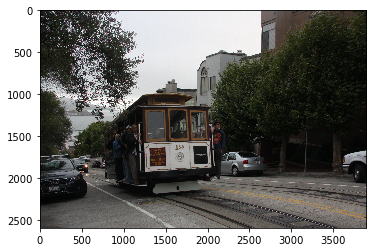

Predicted:
1- streetcar (83.58%)
2- mobile_home (4.29%)
3- recreational_vehicle (3.09%)


In [4]:
# Classify
dir = "./"
for file in os.listdir(dir):
    if file.endswith(".jpg") or file.endswith(".png"):
        classify(os.path.join(dir, file) )